# <u>LOAN CREDIT DEFAULTER ANALYSIS </u>
   ### <u>EDA Case Study :</u>

 ## Problem Statement

The given dataset is collected from one of the largest online loan marketplace facilitating personal loans, business loans, and the financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

<font color = blue>When the company receives a loan application, it has to decide whether to approve or reject it based on the applicant’s profile. Two types of risks are associated with the bank’s decision:</font>

>- <font color = blue>If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.</font>

>- <font color = blue>If the applicant is not likely to repay the loan, i.e., they are likely to default, then approving the loan may lead to financial loss for the company.<font>

The data given below contains information about past loan applicants and whether they have paid the loans or ongoing loan installments or some who could not pay the loan installments on time. 

## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

***Let's look into the dataset to give some insights which can be useful in predicting a particular type of people who are less likely to repay loan ammount on time.***

## 1. Data Cleaning

### Importing Dataset

In [92]:
# Importing warnings

import warnings
warnings.filterwarnings("ignore")

In [93]:
# Importing all the required libraries for analysis

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff 

In [94]:
loan = pd.read_csv("loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [95]:
loan.shape

(39717, 111)

In [96]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [97]:
# Looking at all the column names
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

### Dropping Unwanted columns

##### Some columns have a large number of missing values, let's first fix the missing values and then check for other types of data quality problems.

In [98]:
# summarising number of missing values in each column
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [99]:
# percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

##### Many columns have 100% missing values, some have 65%, 33% etc. First, let's get rid of the columns having 100% missing values.

In [100]:
# removing the columns having more than 90% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]

loan = loan.drop(missing_columns, axis=1)

In [101]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

##### Some more columns are of no use. So, its safe to drop them as well.

In [102]:
# Dropping unwanted columns
loan = loan.drop(['desc', 'mths_since_last_delinq', 'id', 'member_id', 'member_id', 'url', 'zip_code', 'delinq_2yrs','earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc','initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt','pub_rec_bankruptcies', 'tax_liens'], axis=1)

In [103]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti',
       'open_acc', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee',
       'application_type'],
      dtype='object')

In [104]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_title            37258 non-null  object 
 9   emp_length           38642 non-null  object 
 10  home_ownership       39717 non-null  object 
 11  annual_inc           39717 non-null  float64
 12  verification_status  39717 non-null  object 
 13  issue_d              39717 non-null  object 
 14  loan_status          39717 non-null  object 
 15  pymnt_plan           39717 non-null 

In [105]:
# Checking the shape after deleting columns
loan.shape

(39717, 25)

***Reduced the columns from 111 to 25 which contain all the important information required for analysis.***

***Now, the dataset can be cleaned by dealing with the missing values, changing datatypes, etc.***

### Missing Values

In [106]:
loan.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title              2459
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
pymnt_plan                0
purpose                   0
title                    11
addr_state                0
dti                       0
open_acc                  0
total_pymnt               0
total_rec_int             0
total_rec_late_fee        0
application_type          0
dtype: int64

##### emp_title

In [107]:
# Dealing with emp_title column
100*(loan.emp_title.isnull().sum()/len(loan))

6.191303472064859

Since the emp_title has string values, we can replace the null values by 'Other' which will indicate the values which are not provided by the people.

In [108]:
# Filling the missing values with 'Other'
loan.emp_title.fillna("Other", inplace=True)

In [109]:
# Checking null values again
loan.emp_title.isnull().sum()

0

##### emp_length

In [110]:
# checking the percentage of missing values in emp_length column 
100*(loan.emp_length.isnull().sum()/len(loan))

2.7066495455346575

As the most common employment length of most of the people taking loans is more than 10 years.

So, filling the null values with the most common value i.e the mode of emp_length column.

In [111]:
# Filling the missing values with mode of employment length

loan.emp_length.fillna(loan.emp_length.mode()[0], inplace=True)

In [112]:
# Checking null percentage again

100*(loan.emp_length.isnull().sum()/len(loan))

0.0

Now as per our covinience, changing the datatype will be suitable for further analysis.

For that splitting the characters in appropriate format.

In [113]:
# Replacing values

loan.emp_length.replace(["10+ years", "< 1 year", "2 years", "3 years", "4 years", "5 years", "1 year", "6 years", "7 years", "8 years", "9 years"],["10", "1", "2", "3", "4", "5", "1", "6", "7","8", "9"], inplace=True)

In [114]:
loan.emp_length.value_counts()

10    9954
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [115]:
#Now changing the datatype of emp_length

loan.emp_length = pd.to_numeric(loan.emp_length , downcast="signed")

__The datatype of emp_length is changed to integer type and also got rid of the missing values.__

In [116]:
# Checking the null value percentage

100*(loan.isnull().sum()/len(loan))

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              0.000000
emp_length             0.000000
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
pymnt_plan             0.000000
purpose                0.000000
title                  0.027696
addr_state             0.000000
dti                    0.000000
open_acc               0.000000
total_pymnt            0.000000
total_rec_int          0.000000
total_rec_late_fee     0.000000
application_type       0.000000
dtype: float64

### Changing Datatype

##### int_rate

***The datatype of 'int_rate' column is object type but we need numeric datatype for all the numerical analysis.***

In [117]:
# Stripping values of int_rate column in correct format

loan.int_rate = loan.int_rate.apply(lambda x: x.rstrip("%"))

In [118]:
loan.int_rate.value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64

In [119]:
loan.int_rate.dtype

dtype('O')

In [120]:
# Changing datatype to float type

loan.int_rate = pd.to_numeric(loan.int_rate , downcast="float")

In [121]:
loan.dtypes

loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float32
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length                int8
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
pymnt_plan              object
purpose                 object
title                   object
addr_state              object
dti                    float64
open_acc                 int64
total_pymnt            float64
total_rec_int          float64
total_rec_late_fee     float64
application_type        object
dtype: object

In [122]:
# Info of all the columns

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  float32
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_title            39717 non-null  object 
 9   emp_length           39717 non-null  int8   
 10  home_ownership       39717 non-null  object 
 11  annual_inc           39717 non-null  float64
 12  verification_status  39717 non-null  object 
 13  issue_d              39717 non-null  object 
 14  loan_status          39717 non-null  object 
 15  pymnt_plan           39717 non-null 

### Handling Outliers

In [123]:
plt.style.use("default")

In [124]:
sns.set_style("darkgrid")

##### loan_amnt variable

In [125]:
# Describe loan_amnt variable

loan.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

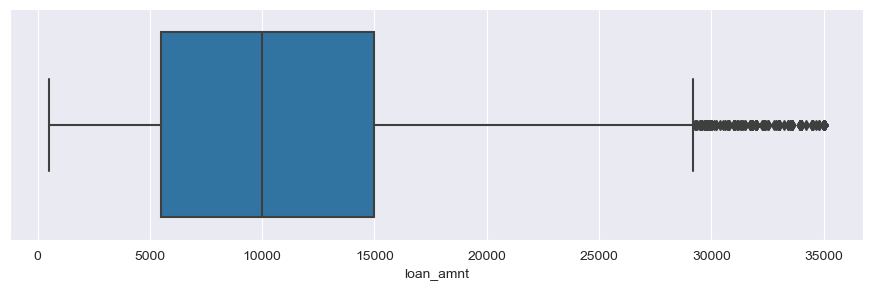

In [126]:
# Plotting boxplot
plt.figure(figsize=[11,3])

sns.boxplot(loan.loan_amnt)
plt.show()

__Conclusion :__
    
>1. The average loan ammount lended to people is about 11000.
   
   >2. Many loan ammounts are above max whisker are of 30000 and more which are the outliers, but they cannot be dropped as these loan ammounts cant be ignored.

##### int_rate variable

In [127]:
# Describe the int_rate variable

loan.int_rate.describe()

count    39717.000000
mean        12.020760
std          3.724828
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

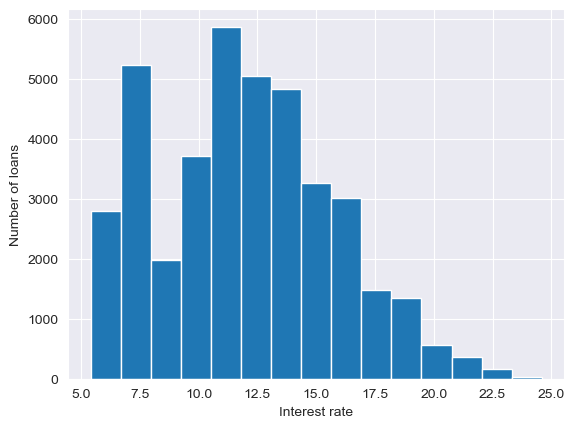

In [128]:
# Plot a bar graph

loan.int_rate.plot(kind="hist", bins=15, edgecolor="white")
plt.xlabel("Interest rate")
plt.ylabel("Number of loans")

plt.show()

__Conclusion :__
> 1. The average interest rate charged by the bank is 12.02% per year with the minimum interest rate of 5.42%.
> 2. Maximum loans of interest of between 11 to 12%. Also, similar range is present for 7.5% interest.
> 2. Also, not many people will apply for the loans with more interest, people always prefer loans with lesser interest.
> 3. Max interest rate charged by bank is 24.59% per year which may affect the payment of loan on time. More the interest rate, less likely is the loan to be repaid.

##### annual_inc variable

In [129]:
loan.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

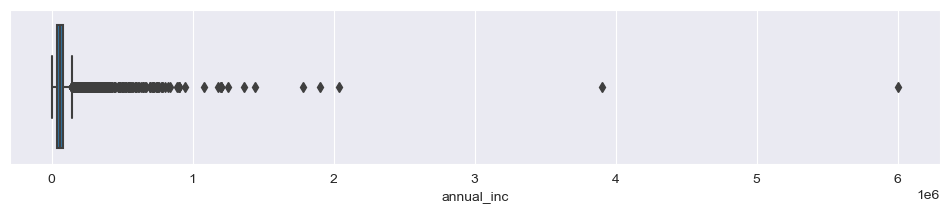

In [130]:
# plot a boxplot
plt.figure(figsize=[12,2])

sns.boxplot(loan.annual_inc)
plt.show()

In [131]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of annual_inc variable

loan.annual_inc.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     59000.00
0.70     75600.00
0.90    116000.00
0.95    142000.00
0.99    234999.36
Name: annual_inc, dtype: float64

In [132]:
# Analyze the outliers

loan[loan.annual_inc > 230000].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,open_acc,total_pymnt,total_rec_int,total_rec_late_fee
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,4.120000e+02,412.000000,412.000000,412.000000,412.000000,412.000000
mean,19530.097087,18896.541262,17903.203927,13.487544,572.093471,5.956311,4.032854e+05,7.322379,11.162621,22129.998457,4448.310534,1.664507
std,10038.920524,9779.177995,10057.414888,4.105012,298.180093,3.581248,4.029429e+05,5.244226,4.916357,13266.853381,4440.340154,8.772459
min,1000.000000,1000.000000,0.000000,5.420000,31.780000,1.000000,2.300040e+05,0.000000,2.000000,390.050000,14.780000,0.000000
25%,10093.750000,10000.000000,9800.000000,10.377500,331.460000,2.000000,2.500000e+05,2.807500,8.000000,11214.314265,1397.575000,0.000000
50%,20000.000000,19412.500000,17500.000000,13.490000,548.265000,6.000000,3.000000e+05,6.585000,11.000000,20786.135000,3127.840000,0.000000
75%,25000.000000,25000.000000,24875.000000,16.320000,830.717500,10.000000,3.900000e+05,10.692500,13.250000,30813.166035,5813.162500,0.000000
max,35000.000000,35000.000000,35000.000000,23.910000,1295.210000,10.000000,6.000000e+06,26.880000,29.000000,57835.279910,22835.280000,86.120000


__Conclusion :__
> 1. There is a compressed mass of values in a small range and a continuous increase after maximum whisker. Also, there are some vlaues far apart from the maximum value.
> 2. The difference between 50% and 90% is very high.

>This means the outliers are present in the annual_inc which is quite obvious.

> 3. These people with more annual income seem to be financially more well off, so they are  more likely to repay the loan.

So, no dropping.

## 2. Univariate Analysis

In [133]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pymnt_plan,purpose,title,addr_state,dti,open_acc,total_pymnt,total_rec_int,total_rec_late_fee,application_type
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Other,10,...,n,credit_card,Computer,AZ,27.65,3,5863.155187,863.16,0.00,INDIVIDUAL
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,...,n,car,bike,GA,1.00,3,1008.710000,435.17,0.00,INDIVIDUAL
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Other,10,...,n,small_business,real estate business,IL,8.72,2,3005.666844,605.67,0.00,INDIVIDUAL
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,n,other,personel,CA,20.00,10,12231.890000,2214.92,16.97,INDIVIDUAL
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,...,n,other,Personal,OR,17.94,15,3513.330000,1037.39,0.00,INDIVIDUAL


### loan_status - The Target variable

In [134]:
# Calculating percentage of loan status 

loan.loan_status.value_counts(normalize=True)

Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: loan_status, dtype: float64

You can see that fully paid comprises most of the loans. The ones marked 'current' are neither fully paid not defaulted, so let's get rid of the current loans. Also, let's tag the other two values as 0 or 1.

In [135]:
# filtering only fully paid or charged-off
loan = loan[loan['loan_status'] != 'Current']
loan['loan_status'] = loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
loan['loan_status'] = loan['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
loan['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [136]:
# Plot a pie chart
go.Figure(data=[go.Pie(labels=loan.loan_status.value_counts().index,
                      values=loan.loan_status.value_counts().values, hole=0.5, title="Loan Status Counts",
                      pull=[0,0.1,0.1])])

In [137]:
# default rate
round(np.mean(loan['loan_status']), 2)

0.15

__Default rate :__ 
> The overall default rate is about 15% whichis a big loss to the company. 

> We'll analyze the ways to reduce this loss in following analysis. 

### term variable

In [138]:
loan.term.value_counts(normalize=True)

 36 months    0.754232
 60 months    0.245768
Name: term, dtype: float64

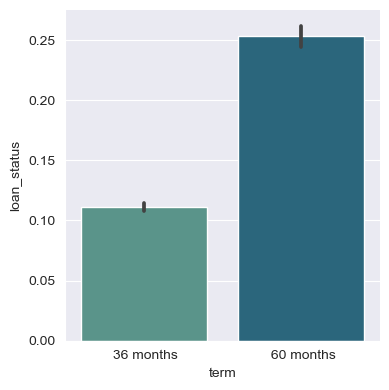

In [139]:
# Plot a bar graph

sns.catplot(data=loan, x="term", y="loan_status", kind='bar',height=4, palette="crest", )
plt.show()

__Conclusion :__
> 1. More than 75% of loans are having a term of 36 months and nearly 24% have 60 months term plan.
> 2. 60 months loans default more than 36 months loans.

### grade variable

<Figure size 400x400 with 0 Axes>

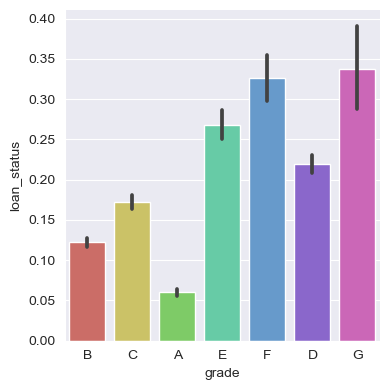

In [140]:
# Plot a bar graph
fig = plt.figure(figsize=[4,4])

sns.catplot(data=loan, x="grade", y="loan_status", kind='bar',height=4, palette="hls")
plt.show()

__Conclusion :__
> 1. Clearly, as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the riskiness of the loan. 

### emp_length variable

In [141]:
# Calculate the percentage of each employment length category

loan.emp_length.value_counts(normalize=True)

10    0.246805
1     0.199005
2     0.111232
3     0.104000
4     0.086632
5     0.082795
6     0.056199
7     0.044353
8     0.037198
9     0.031781
Name: emp_length, dtype: float64

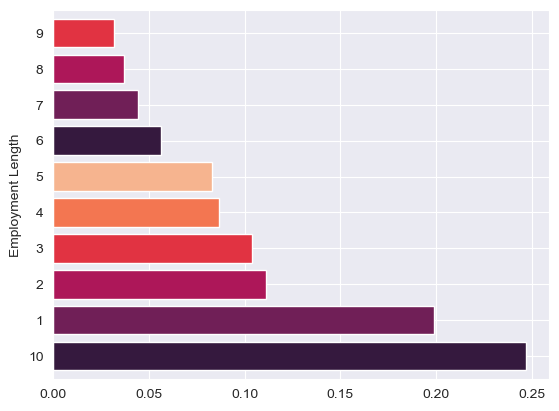

In [142]:
# Plot a bargraph

palette=sns.color_palette("rocket")

loan.emp_length.value_counts(normalize=True).plot(kind="barh",width=0.8, align='center', color=palette)
plt.ylabel("Employment Length")
plt.show()

__Conclusion :__
> 1. About 25% of the people taking loan have a employment length of more than 10 years. And lending money to these people is safer as there are high chances of repayment.
> 2. About 19% people have employment experience of a year or less. 
> 3. Then we have a continuous decrease in the percentage of lending loans from 2 to 9 years of employment experience to people.

### dti variable

We have to convert dti(debt to income ratio) to a categorical type where we will have low, medium and high categories for the dti

In [143]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

loan['dti'] = loan['dti'].apply(lambda x: dti(x))

<Figure size 600x400 with 0 Axes>

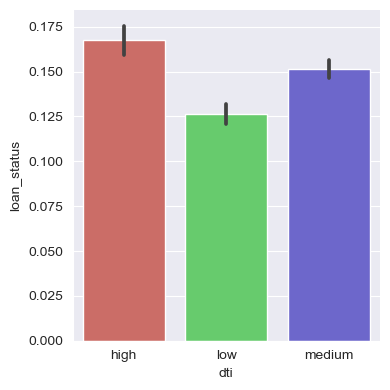

In [144]:
# Plot a bar graph
fig = plt.figure(figsize=[6,4])

sns.catplot(data=loan, x="dti", y="loan_status", kind='bar',height=4, palette="hls")
plt.show()

Obviously the high dti ratio will lead to more defaults.

### home_ownership Vs loan_status      AND
###  verification_status Vs loan_status

In [145]:
# Calculate values in home_ownership variable
loan.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

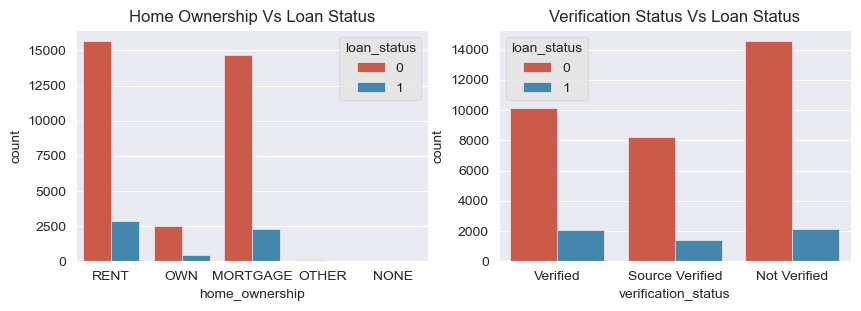

In [146]:
# Plot barplots of home_ownership and verification status Vs loan_status
fig = plt.figure(figsize=[10,3])

ax1 = fig.add_subplot(1,2,1, title="Home Ownership Vs Loan Status")
ax2 = fig.add_subplot(1,2,2, title="Verification Status Vs Loan Status")

plt.style.use("ggplot")

sns.countplot(loan.home_ownership, hue=loan.loan_status, ax=ax1)
sns.countplot(loan.verification_status, hue=loan.loan_status, ax=ax2)

plt.show()

__Conclusion :__
> 1. A maximum of people having loans are living in a rental house.
> 2. Maximum people have mortgage type home_ownership meaning they took a home loan. Maximum of which have repaid their loan.
> 3. People who have their own house are very less likely to default as well.
> 4. Least count of people having thier loans charged off are having their own home.

> 5. Surprisingly, Verification status is not a great discriminator.


### issue_d variable

Let's also observe the distribution of loans across years. <br>First lets convert the year column into datetime and then extract year and month from it

In [147]:
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [148]:
from datetime import datetime
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [149]:
# extracting month and year from issue_date
loan['month'] = loan['issue_d'].apply(lambda x: x.month)
loan['year'] = loan['issue_d'].apply(lambda x: x.year)

# let's first observe the number of loans granted across years
loan.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
Name: year, dtype: int64

We can see that the number of loans has increased steadily across years.

In [150]:
# number of loans across months
loan.groupby('month').month.count()

month
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3498
10    3761
11    4006
12    4215
Name: month, dtype: int64

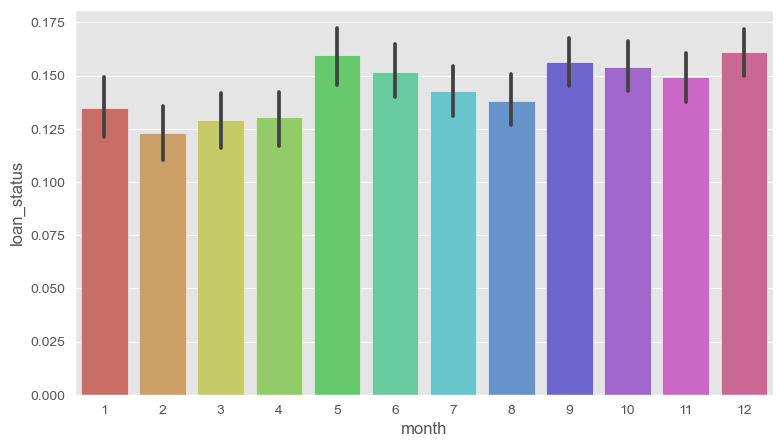

In [151]:
plt.figure(figsize=[9,5])

sns.barplot(data=loan, x="month", y='loan_status',orient='v', palette="hls")
plt.show()

The default rate is comparatively more in May, June, September, October,December.

### annual_inc Vs loan_status

Now, Creating bins for continous variable categories column 'annual_inc'

In [152]:
#groupby the loan_status to find the mean of the annual_inc with loan_status charged_off and fully paid seperatly.
loan.groupby(["loan_status"])["annual_inc"].mean()

loan_status
0    69862.503328
1    62427.298034
Name: annual_inc, dtype: float64

In [153]:
# Creating bins for income amount

bins = [0,2500,5000,7500,10000,12500,15000,17500,20000,22500,25000,27500,30000,32500,35000,37500,40000,42500,45000,47500,50000,1000000000]
slot = ['0-2500', '2500-5000','5000-7500','7500,10000','10000-12500', '12500-15000', '15000-17500','17500-20000',
       '20000-22500','22500-25000','25000-27500','27500-30000','30000-32500','32500-35000','35000-37500',
       '37500-40000','40000-42500','42500-45000','45000-47500','47500-50000', '50000 and above']

loan['annual_inc_1']=pd.cut(loan['annual_inc'],bins,labels=slot)

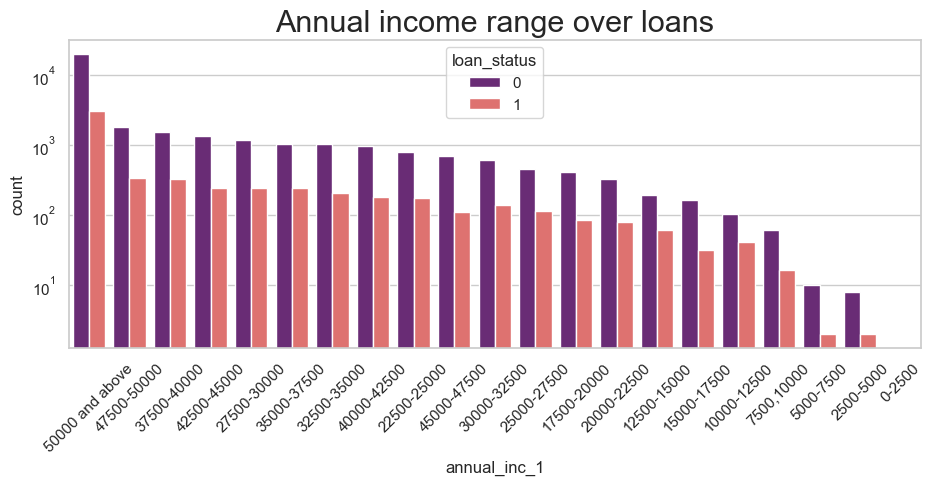

In [154]:
# PLotting for income range Vs loan_status
sns.set(rc={'figure.figsize':(11,4)})

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set_style('whitegrid')

fig, ax = plt.subplots()
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Annual income range over loans", fontsize= 22)
ax = sns.countplot(data = loan, x= "annual_inc_1", order=loan["annual_inc_1"].value_counts().index,hue="loan_status",palette='magma') 
        
plt.show()

__Conclusion :__
> 1. Most of the loans which are fully paid have average annual income of 70000; while people whose loans are charged off have average annual income of about 62000. 
> 2. Income range from 50000 and above is having more number of loans that are fully paid, same as for charged off loans.
> 3. Very less count for income range 5000 and below. And the charged off loans are also negligible for this range. 

### int_rate Vs loan_status

In [155]:
#groupby the loan_status to find the mean of the int_rate.

loan.groupby(["loan_status"])["int_rate"].mean()

loan_status
0    11.609761
1    13.820432
Name: int_rate, dtype: float32

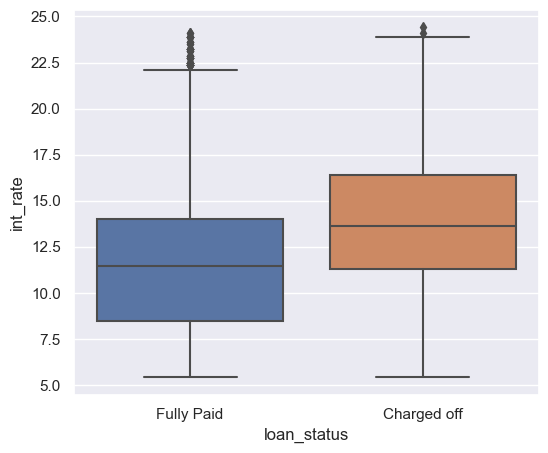

In [156]:
# Plot a boxplot
sns.set(rc={'figure.figsize':(6,5)})

sns.boxplot(data=loan, x="loan_status", y="int_rate")
plt.xticks([0,1],["Fully Paid", "Charged off"])
plt.show()

__Conclusion :__
> 1. The median interest rate on fully paid loans is about 11%.
> 2. The median interest rate on charged off loans is about 14%.
> 3. Overall, the charged off loans have higher rate of interest.

We can conclude from the outliers that the loans with lower interests are repaid. Most of the loans having higher interest rate are at a high risk of getting charged off.

### loan_amnt Vs purpose Vs loan_status

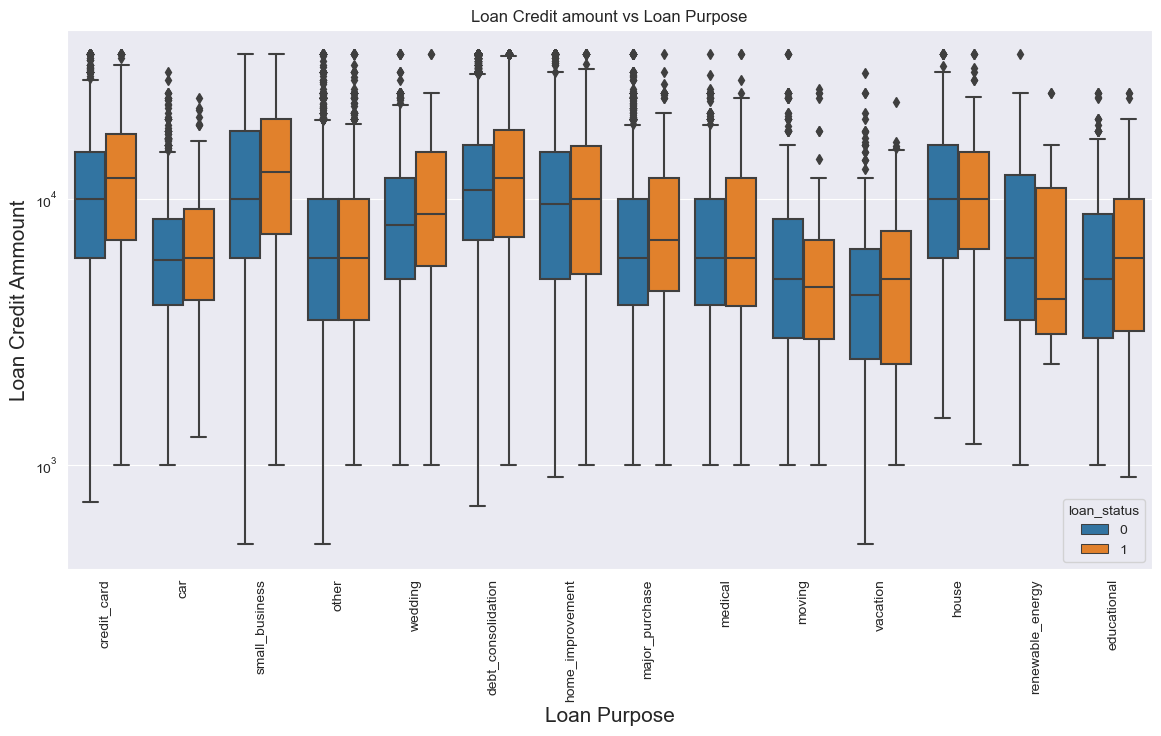

In [157]:
# Box plotting for Credit amount in logarithmic scale
plt.style.use("default")
sns.set_style("darkgrid")

plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =loan, x='purpose',y='loan_amnt', hue="loan_status", orient='v')
plt.title('Loan Credit amount vs Loan Purpose')
plt.xlabel("Loan Purpose", fontsize=15)
plt.ylabel("Loan Credit Ammount", fontsize=15)
plt.show()

__Conclusion :__
> 1. The credit amount of Loan purposes like 'Buying a house' or 'Home improvement', 'Credit card' and 'Small business' is higher with maximum defaulter rate.
> 2. Money for 'Car loan' , 'Vacation' and 'Education' is having less credits applied for. The default rate is also very less for these purposes.

## 4. Segmented Analysis

### term Vs purpose Vs loan_status

In the upcoming analyses, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate.

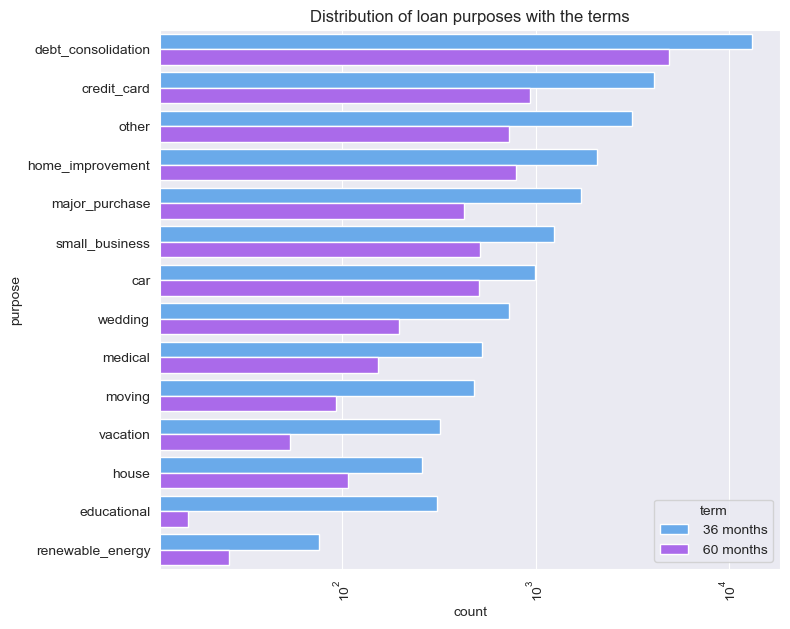

In [158]:
# Plot a graph of distribution of loans with purposes
plt.figure(figsize=[8,7])

sns.countplot(data = loan, y= 'purpose', 
                   order=loan.purpose.value_counts().index,hue = 'term',palette='cool')
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of loan purposes with the terms')
plt.show()

Most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.<br><br>
Let's analyse the top 4 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.

In [159]:
# filtering the data for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
loan = loan[loan['purpose'].isin(main_purposes)]
loan['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
home_improvement       2875
major_purchase         2150
Name: purpose, dtype: int64

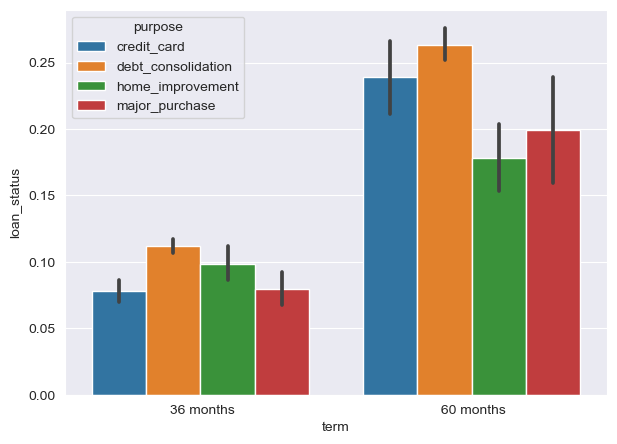

In [160]:
# let's now compare the default rates across two types of categorical variables
# purpose of loan (constant) and another categorical variable (which changes)

plt.figure(figsize=[7, 5])
sns.barplot(x='term', y="loan_status", hue='purpose', data=loan)
plt.show()


__Conclusion:__
> 1. Mostly the loans for debt-consolidation with 60 months term length are having maximum defaluter rate.
> 2. Credit card loans with 60 months term length are also at high risk of getting charged off.
> 3. Overall, maximum defaulte rate lie in 60 months term length. 

### year Vs purpose Vs loan_status

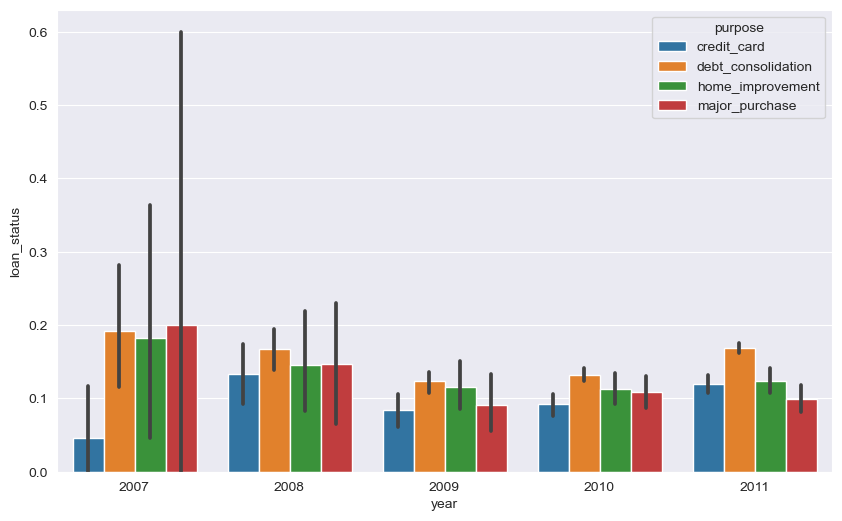

In [161]:
# let's now compare the default rates across two types of categorical variables purpose of loan and year of loan approved.

plt.figure(figsize=[10,6])
sns.barplot(x='year', y="loan_status", hue='purpose', data=loan)
plt.show()


__Conclusion:__
> 1. There is no much difference in loan pattern from 2008 to 2011.
> 2. While in year 2007, most of the defaults are caused with major_purchase showing the maximum defalut rate.
> 3. Throughout all these years, debt-consolidation remains the main purpose causing defaluts.

### grade Vs purpose Vs loan_status

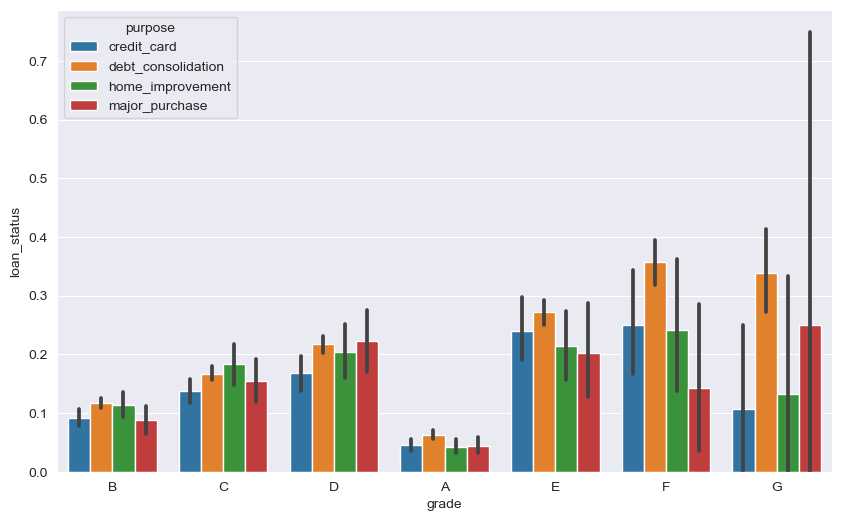

In [162]:
# let's now compare the default rates across purpose of loan and grade of loan.
plt.figure(figsize=[10,6])

sns.barplot(x='grade', y="loan_status", hue='purpose', data=loan)
plt.show()

__Conclusion:__
> 1. Clearly most of the defaulter loans are in E, F and G grade where debt-consolidation is sowing the highest peak. 
> 2. The defaulter rate is increasing from A to G as we have already seen before.

## 4. Multivariate Analysis

In [163]:
# finding correlation between all the numerical variables in loan dataset

loan.corr(method='spearman')

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,open_acc,total_pymnt,total_rec_int,total_rec_late_fee,month,year
loan_amnt,1.000000,0.988542,0.934147,0.272395,0.950620,0.136245,0.431008,0.056701,0.194931,0.877930,0.769011,-0.006964,0.052293,0.083875
funded_amnt,0.988542,1.000000,0.946802,0.281790,0.968537,0.136805,0.426593,0.054872,0.192112,0.888934,0.777703,-0.005128,0.041853,0.100209
funded_amnt_inv,0.934147,0.946802,1.000000,0.269872,0.907296,0.151693,0.404829,0.036172,0.178095,0.853788,0.747817,-0.021366,0.070494,0.216540
int_rate,0.272395,0.281790,0.269872,1.000000,0.267824,-0.001281,0.070153,0.204710,-0.007969,0.244950,0.531615,0.093573,0.020677,0.015741
installment,0.950620,0.968537,0.907296,0.267824,1.000000,0.112568,0.423357,0.028478,0.183920,0.864891,0.725938,-0.002818,0.036287,0.053660
emp_length,0.136245,0.136805,0.151693,-0.001281,0.112568,1.000000,0.167477,0.029373,0.087557,0.114071,0.092847,-0.016085,0.023496,0.112175
annual_inc,0.431008,0.426593,0.404829,0.070153,0.423357,0.167477,1.000000,-0.071803,0.292574,0.407194,0.299687,-0.019569,0.010570,0.033800
loan_status,0.056701,0.054872,0.036172,0.204710,0.028478,0.029373,-0.071803,1.000000,-0.005253,-0.288383,0.002211,0.181716,0.023017,0.037607
open_acc,0.194931,0.192112,0.178095,-0.007969,0.183920,0.087557,0.292574,-0.005253,1.000000,0.174273,0.139908,-0.030248,0.000222,0.020967
total_pymnt,0.877930,0.888934,0.853788,0.244950,0.864891,0.114071,0.407194,-0.288383,0.174273,1.000000,0.811944,-0.039224,0.028848,0.078424


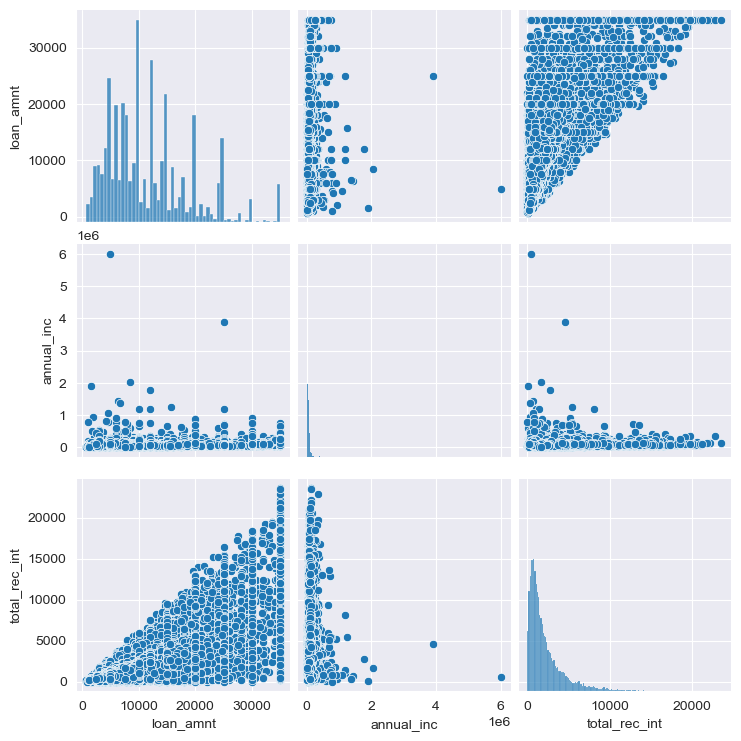

In [164]:
# Plot a pairplot 'loan_amnt', 'annual_inc', 'total_rec_int' variables
plt.style.use("default")
sns.set_style("darkgrid")

sns.pairplot(data=loan, vars=["loan_amnt", "annual_inc", "total_rec_int"])
plt.show()

In [165]:
# Quantify between these three variables

loan[["loan_amnt", "annual_inc", "total_rec_int"]].corr()

,loan_amnt,annual_inc,total_rec_int
loan_amnt,1.000000,0.247991,0.724095
annual_inc,0.247991,1.000000,0.168384
total_rec_int,0.724095,0.168384,1.000000


__Conclusion :__
> 1. The correlation between numeric variables is as shown above.
> 2. The interest recieved is higher towards higher credit ammounts.
> 3. Major loans are from families having lower annual incomes.

## OVERALL INSIGHTS:

__1. Bank should focus more on older people having more length of employment than those having lesser employment years to ensure repayments.__

__2. Bank should check many times while providing loans to purposes like 'Buying a house', 'Credit card' and 'debt_consolidation' as these types have highest default rate.__

__3. The annual incomes should be verfied to avoid any risk.__ 

__4. Mortgage loans are a good option for increasing business which is the safest option for banks to reduce unsuccessful payments.__

__5. Families with less income should be focused to increase business.__

__6. Also loans with more interest are at high risk of getting charged off. So, bank should not exceed the interest rate more than 15% on higher credits as they might not br repayed fully. Instead the interest rate should be in range of 7% to 12% max.__

__7. Also with loan purpose ‘Small Business’ and 'Credit Card' is having higher number of unsuccessful payments on time, so avoiding these purposes is a good option.__

__8. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.__

## 5. Correlation Matrix

In [176]:
loan.shape

(28107, 28)

In [177]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti',
       'open_acc', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee',
       'application_type', 'month', 'year', 'annual_inc_1'],
      dtype='object')

<AxesSubplot:>

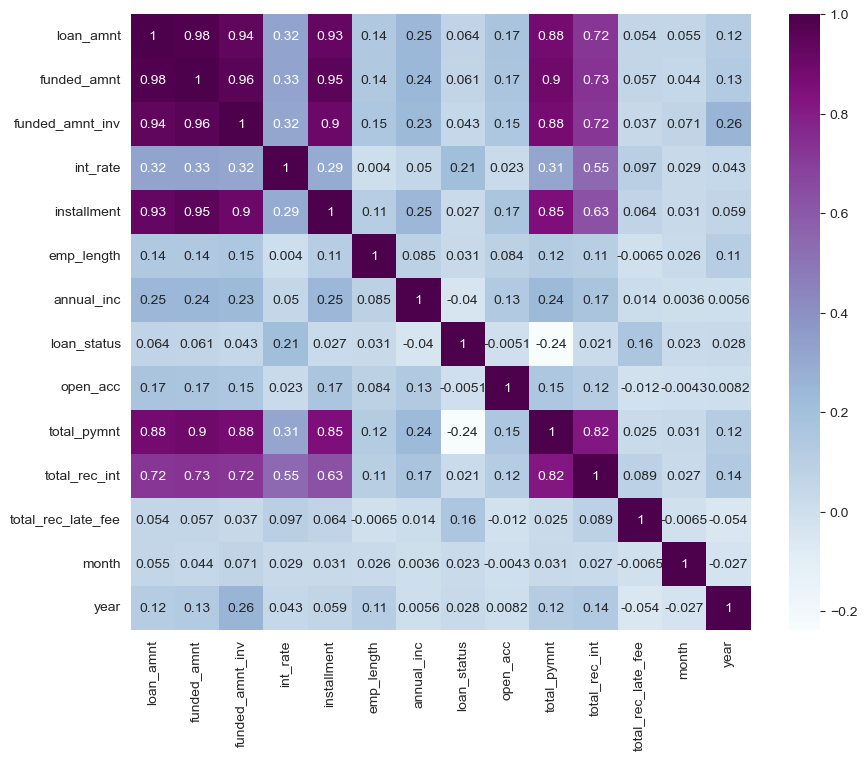

In [178]:
plt.figure(figsize=[10,8])
corr = loan.corr()
sns.heatmap(corr, annot=True, cmap="BuPu")

In [179]:
# Some columns are highly correlated, so its better to drop them to build more accurate model
cols = ["funded_amnt", "funded_amnt_inv", "total_rec_int", "total_pymnt", "emp_title", "addr_state", "sub_grade", "pymnt_plan", "annual_inc_1", "issue_d", "title", "year"]
loan = loan.drop(columns=cols, axis=1)

In [190]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,total_rec_late_fee,application_type,month
0,8.517193,36 months,10.65,5.092952,B,10,RENT,10.085809,Verified,0,credit_card,high,3,0.0,INDIVIDUAL,12
6,8.853665,60 months,15.96,5.136269,C,8,RENT,10.757988,Not Verified,0,debt_consolidation,high,7,0.0,INDIVIDUAL,12
10,8.779557,60 months,14.65,5.033375,C,5,OWN,11.184421,Not Verified,0,debt_consolidation,medium,14,0.0,INDIVIDUAL,12
11,9.392662,36 months,12.69,5.997794,B,10,OWN,11.225243,Source Verified,0,debt_consolidation,medium,12,0.0,INDIVIDUAL,12
12,9.104980,36 months,13.49,5.721557,C,1,RENT,10.308953,Source Verified,1,debt_consolidation,medium,4,0.0,INDIVIDUAL,12


Here, some columns like annual_inc, loan_amnt, installment are having high range values. So, its better to normalize them.

In [181]:
# Apply log transformation to 'annual_inc' attribute
loan["annual_inc"] = np.log(loan["annual_inc"])

In [185]:
# Apply log transformation to 'loan_amnt' attribute
loan["loan_amnt"] = np.log(loan["loan_amnt"])

In [188]:
# Apply log transformation to 'installment' attribute
loan["installment"] = np.log(loan["installment"])

## 6. Label Encoding

In [191]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
cols = ["term", "grade", "home_ownership", "verification_status", "purpose", "dti", "application_type"]
le = LabelEncoder()
for col in cols:
    loan[col] = le.fit_transform(loan[col])

In [192]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,total_rec_late_fee,application_type,month
0,8.517193,0,10.65,5.092952,1,10,4,10.085809,2,0,0,0,3,0.0,0,12
6,8.853665,1,15.96,5.136269,2,8,4,10.757988,0,0,1,0,7,0.0,0,12
10,8.779557,1,14.65,5.033375,2,5,3,11.184421,0,0,1,2,14,0.0,0,12
11,9.392662,0,12.69,5.997794,1,10,3,11.225243,1,0,1,2,12,0.0,0,12
12,9.104980,0,13.49,5.721557,2,1,4,10.308953,1,1,1,2,4,0.0,0,12


## 7. Train-Test Split

In [193]:
# Specify input and output attributes
X = loan.drop(columns=["loan_status"], axis=1)
y = loan["loan_status"]

In [235]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 8 . Model Training

In [236]:
# Classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy of the model is", model.score(x_test, y_test)*100)
    # Cross - validation
    # eg : cv=5; train - 4, test - 1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross Validation is ", np.mean(score)*100)

We will try 4 models for our classification. 
- Logistic Regression
- Decision Tree
- Random Forest
- Extra Trees

In [237]:
# Create a Logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy of the model is 86.05379251458659
Cross Validation is  86.32368606038582


In [238]:
# Create a Decision tree model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy of the model is 78.3264551017504
Cross Validation is  73.28787438932028


In [239]:
# Create a RandomForest regression model
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy of the model is 86.62302547317489
Cross Validation is  86.14581848028728


In [240]:
# create a ExtraTrees regression model
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy of the model is 85.79763768322186
Cross Validation is  85.55163904530143


## 9. Confusion Matrix

In predictive analytics, a table of confusion is a table with two rows and two columns that reports the number of true positives, false negatives, false positives, and true negatives.


In [209]:
# Select most accurate model
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [210]:
# Plot a confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[6004,   36],
       [ 896,   91]], dtype=int64)

<AxesSubplot:>

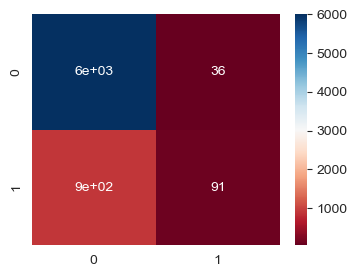

In [234]:
plt.figure(figsize=[4,3])
sns.heatmap(cm, annot=True, cmap="RdBu")

__6004 times our model predicted the loan status correctly.__

__It failed to correctly guess loan defaulters for 896 times.__